# Assignment 2: Inverse kinematics of our leg

Use this noteboook to document interacting with the robot class. The primary goal for this assignment is a video recording and plot rendering of your robot leg commanded to move along an *interesting* path (see the bat sign I chose in the readme page). 

__Deliverables__
1. Your leg.py file in the robot python module we are creating. The template provided has blank functions which need to be completed.
2. Two videos, a video of your robot tracing out your commanded trajectory (uploaded to youtube), and a gif of robot commanded trajectory (like on the readme page).
3. This notebook which you will use to send the move commands for the trajectory.


Team #: 2

Names: Emily Lathrop, Wei Li

# Getting started

In [1]:
# Import the robot class we are developing
import robot

# Make a new leg variable which is a robot.Leg class
leg = robot.Leg()

In [2]:
leg.get_joint_pos()
print('joint0: %f \t joint1: %f' % (leg.joint_0_pos, leg.joint_1_pos))

joint0: 2.000000 	 joint1: 1.400000


# Your code below!

In [3]:
# for the simulation
# input points on the trajectory and return the angles
tt = 14
xx = [-1.25305623471883, -2.36552567237164, -2.80562347188264, -1.85207823960880, -0.201711491442543,
      0.715158924205378, 2.13325183374083, 2.85452322738386, 3.28239608801956, 3.25794621026895,
      2.56112469437653, 1.82762836185819, 0.409535452322737, -1.25305623471883]

yy = [17.9278728606357, 16.5097799511002, 14.9572127139364, 13.4902200488998, 13.1112469437653,
      13.0867970660147, 13.3190709046455, 14.4070904645477, 15.4584352078240, 16.6564792176039,
      17.7567237163814, 17.9034229828851, 18.2212713936430, 17.9278728606357]

(sim_theta0, sim_theta1, sim_alpha0, sim_alpha1) = leg.move_trajectory(tt, xx, yy)

In [14]:
# Define a draw function
import matplotlib.pyplot as plt
from sympy import sin, cos
import numpy as np


def sim_draw_leg(l0, l1, l2, theta1, theta2, alpha1, alpha2, ax=False):
    """
    This function takes in the four angles of the leg and draws
    the configuration
    """

    link1, link2, width = l1, l2, l0
    cor_range = l1 + l2
    
    if ax == False:
        ax = plt.gca()
        ax.cla()

    ax.plot(-width / 2, 0, 'ok')
    ax.plot(width / 2, 0, 'ok')

    ax.plot([-width / 2, 0], [0, 0], 'k')
    ax.plot([width / 2, 0], [0, 0], 'k')

    ax.plot(-width / 2 + np.array([0, link1 * cos(theta1)]), [0, link1 * sin(theta1)], 'k')
    ax.plot(width / 2 + np.array([0, link1 * cos(theta2)]), [0, link1 * sin(theta2)], 'k')

    ax.plot(-width / 2 + link1 * cos(theta1) + np.array([0, link2 * cos(alpha1)]), \
            link1 * sin(theta1) + np.array([0, link2 * sin(alpha1)]), 'k');
    ax.plot(width / 2 + link1 * cos(theta2) + np.array([0, link2 * cos(alpha2)]), \
            np.array(link1 * sin(theta2) + np.array([0, link2 * sin(alpha2)])), 'k');
            
    curr_x = float(width / 2 + link1 * cos(theta2) + link2 * cos(alpha2))
    curr_y = float(np.array(link1 * sin(theta2) + link2 * sin(alpha2)))

    ax.plot(curr_x, curr_y, 'ro');

    ax.axis([-cor_range, cor_range, -l1, cor_range])
    ax.invert_yaxis()


# Draw the legs and trajectory
%matplotlib qt5

for i in range(tt):
    sim_draw_leg(7.7, 7, 14, sim_theta0[i], sim_theta1[i], sim_alpha0[i], sim_alpha1[i])
    plt.plot(xx[0:i+1], yy[0:i+1])
    plt.pause(.35)

# Trajectory gif
![title](Sim_trajectory.gif)

In [9]:
# Verify legs are at home position (pi/2, pi/2)
(x,y) = leg.get_joint_pos()
print(float(x))
print(float(y))

1.5713809048820633
1.566775295302795


In [10]:
# thetas acquired from the simulation
theta0 = sim_theta0
theta1 = sim_theta1

# set home position
leg.set_home()


In [12]:
#trace out trajectory on the actual arm
import time
for i in range(14):
    leg.set_joint_pos(theta0[i], theta1[i])
    time.sleep(.25)


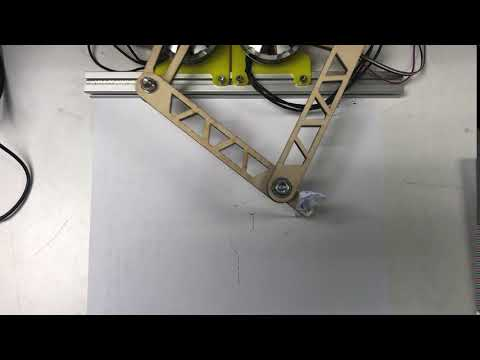

In [2]:
# YouTube Videos
from IPython.lib.display import YouTubeVideo

YouTubeVideo('_z-Ip1bBhz0')